# Importing the required libraries

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset to the pandas dataframe.

In [48]:
df = pd.read_csv('https://raw.githubusercontent.com/santhoshsai3/CMPE255-TermProject/main/ratings_Beauty.csv')


# Summary of Dataset

In [49]:
print("shape of the dataset :" , df.shape)
(rows,cols) = df.shape
print("The number of rows : ", rows)
print("The number of columns : ", cols)

shape of the dataset : (2023070, 4)
The number of rows :  2023070
The number of columns :  4


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserId     object 
 1   ProductId  object 
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 61.7+ MB


In [51]:
df.describe()

,Rating,Timestamp
count,2.023070e+06,2.023070e+06
mean,4.149036e+00,1.360389e+09
std,1.311505e+00,4.611860e+07
min,1.000000e+00,9.087552e+08
25%,4.000000e+00,1.350259e+09
50%,5.000000e+00,1.372810e+09
75%,5.000000e+00,1.391472e+09
max,5.000000e+00,1.406074e+09


In [52]:
#displaying the dataset
df

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200
...,...,...,...,...
2023065,A3DEHKPFANB8VA,B00LORWRJA,5.0,1405296000
2023066,A3DEHKPFANB8VA,B00LOS7MEE,5.0,1405296000
2023067,AG9TJLJUN5OM3,B00LP2YB8E,5.0,1405382400
2023068,AYBIB14QOI9PC,B00LPVG6V0,5.0,1405555200


In [53]:
#checking for the data integriety by finding the duplicate rows.
duplicates = df.duplicated(["UserId","ProductId", "Rating", "Timestamp"]).sum()
print(' Duplicate records: ',duplicates)

 Duplicate records:  0


In [54]:
#checking for the data integriety by finding the duplicate users.
duplicates = df.duplicated(["UserId"]).sum()
print(' Duplicate records: ',duplicates)

 Duplicate records:  812799


In [55]:
#Printing the number of unique users
print('unique users:',len(df['UserId'].unique()))



unique users: 1210271


In [56]:
#Printing the number of unique products
print('unique products:',len(df['ProductId'].unique()))


unique products: 249274


In [57]:
#Printing the number of unique ratings
print('unique ratings:',len(df['Rating'].unique()))

unique ratings: 5


In [58]:
df.drop('Timestamp',axis=1,inplace=True)

# Handling null values

In [59]:
df.isnull().any()

UserId       False
ProductId    False
Rating       False
dtype: bool

#Data Analysis

In [60]:
#Number of rated products per user

prod_per_user= df.groupby(by = "UserId")["Rating"].count().sort_values(ascending =False)
prod_per_user.head()

UserId
A3KEZLJ59C1JVH    389
A281NPSIMI1C2R    336
A3M174IC0VXOS2    326
A2V5R832QCSOMX    278
A3LJLRIZL38GG3    276
Name: Rating, dtype: int64

In [61]:
#Number of ratings per product

product_rating = df.groupby(by = "ProductId")["Rating"].count().sort_values(ascending = False)
product_rating.head()

ProductId
B001MA0QY2    7533
B0009V1YR8    2869
B0043OYFKU    2477
B0000YUXI0    2143
B003V265QW    2088
Name: Rating, dtype: int64

In [62]:
#Number of products rated by each user

rated_users=df.groupby("UserId")["ProductId"].count().sort_values(ascending=False)
print(rated_users)

UserId
A3KEZLJ59C1JVH    389
A281NPSIMI1C2R    336
A3M174IC0VXOS2    326
A2V5R832QCSOMX    278
A3LJLRIZL38GG3    276
                 ... 
A2G8M8PDTN09UZ      1
A2G8MAFIIQSJ42      1
A2G8MTKRE6MV52      1
A2G8MWBXG6JIY6      1
AZZZU2TD7Q3ET       1
Name: ProductId, Length: 1210271, dtype: int64


In [63]:
#Number of users who rated each product

rated_products=df.groupby("ProductId")["UserId"].count().sort_values(ascending=False)
print(rated_products)

ProductId
B001MA0QY2    7533
B0009V1YR8    2869
B0043OYFKU    2477
B0000YUXI0    2143
B003V265QW    2088
              ... 
B004U81OBC       1
B004U7R0EI       1
B004U7Q2O2       1
B004U7NKRE       1
B00LU0LTOU       1
Name: UserId, Length: 249274, dtype: int64


In [64]:
#Number of products with some minimum ratings

print('Number of products with minimum of 5 reviews/ratings:',rated_products[rated_products>5].count())
print('Number of products with minimum of 4 reviews/ratings:',rated_products[rated_products>4].count())
print('Number of products with minimum of 3 reviews/ratings:',rated_products[rated_products>3].count())
print('Number of products with minimum of 2 reviews/ratings:',rated_products[rated_products>2].count())
print('Number of products with minimum of 1 reviews/ratings:',rated_products[rated_products>1].count())

Number of products with minimum of 5 reviews/ratings: 57722
Number of products with minimum of 4 reviews/ratings: 67345
Number of products with minimum of 3 reviews/ratings: 81247
Number of products with minimum of 2 reviews/ratings: 103581
Number of products with minimum of 1 reviews/ratings: 145790


# Data Visualization

In [65]:
!pip install plotly==5.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [66]:
import plotly.graph_objects as go
colours =["#DC143C","#97FFFF"]
index = ['Total size of records', "Number of unique users","Number of unique products"]
values =[len(df),len(df['UserId'].unique()),len(df['ProductId'].unique())]

plot = go.Figure([go.Bar(x=index, y=values,textposition='auto',marker_color= ('lightpink','plum','  lightsteelblue'))])
plot.update_layout(title_text='Number of Users and Products w.r.to Total size of Data',
                    xaxis_title="Records",
                    yaxis_title="Total number of Records")

plot.show()
#This plot shows the total records in the dataset and the unique users and products

In [67]:
print("Range of Ratings: ", df['Rating'].value_counts())
print(list(df['Rating'].value_counts()))

values = list(df['Rating'].value_counts())

plot = go.Figure([go.Bar(x = df['Rating'].value_counts().index, y = values,textposition='auto')])

plot.update_layout(title_text='Ratings given by user',
                    xaxis_title="Rating",
                    yaxis_title="Total number of Ratings")

plot.show()
#This plot shows the frequency of each different rating. 


Range of Ratings:  5.0    1248721
4.0     307740
1.0     183784
3.0     169791
2.0     113034
Name: Rating, dtype: int64
[1248721, 307740, 183784, 169791, 113034]


In [68]:
print("Products with occurred the most: \n",df['ProductId'].value_counts().nlargest(5))

values = list(df['ProductId'].value_counts())


plot = go.Figure([go.Bar(x = df['ProductId'].value_counts().nlargest(5).index, y = values,textposition='auto')])

plot.update_layout(title_text='Most rated products',
                    xaxis_title="ProductID",
                    yaxis_title="Number of times occurred in the data")

plot.show()

#This plot shows the popular products and the ratings given to them.

Products with occurred the most: 
 B001MA0QY2    7533
B0009V1YR8    2869
B0043OYFKU    2477
B0000YUXI0    2143
B003V265QW    2088
Name: ProductId, dtype: int64


In [69]:
ratings_per_user = df.groupby('UserId')['Rating'].count().sort_values(ascending=False)
print("Average rating given by each user: ",ratings_per_user.head())

plot = go.Figure(data=[go.Histogram(x=ratings_per_user)])
plot.show()


Average rating given by each user:  UserId
A3KEZLJ59C1JVH    389
A281NPSIMI1C2R    336
A3M174IC0VXOS2    326
A2V5R832QCSOMX    278
A3LJLRIZL38GG3    276
Name: Rating, dtype: int64


In [70]:
ratings_per_product = df.groupby('ProductId')['Rating'].count().sort_values(ascending=False)
# print("Average rating given by each user: ",ratings_per_user.head())

plot = go.Figure(data=[go.Histogram(x=ratings_per_product)])
plot.show(title_text='Number of ratings per product',
                    xaxis_title="Product",
                    yaxis_title="Number of ratings")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f33b11f9210>]],
      dtype=object)

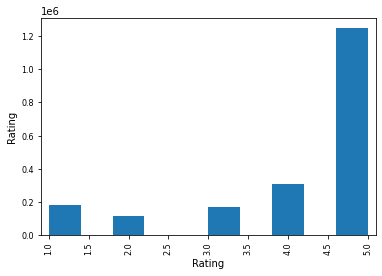

In [71]:
#plotScatterMatrix(df, 6, 15)
pd.plotting.scatter_matrix(df)

In [72]:
#As data is huge so we take a fraction of the data so that we can create a user item matrix. 

data1 = df.head(10000)
ratings_utility_matrix = data1.pivot_table(values='Rating', index='UserId', columns='ProductId').fillna(0)
ratings_utility_matrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A024581134CV80ZBLIZTZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A03056581JJIOL5FSKJY7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A03099101ZRK4K607JVHH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0505229A7NSH3FRXRR4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


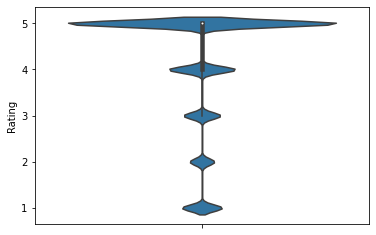

In [73]:
sns.violinplot(y = df.Rating)

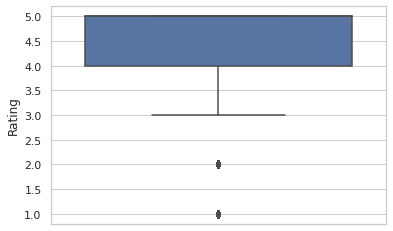

In [74]:
sns.set(style="whitegrid")
sns.boxplot(y = df['Rating'])

# Splitting the data for train and test
## We took 30% as testing data and 70% as training data.

In [75]:
from sklearn.model_selection import train_test_split
train_data, test_data=train_test_split(data1,test_size=0.3,random_state=0)

In [76]:
train_data

,UserId,ProductId,Rating
7681,A3PTZFRD34YJ2P,B000052YM8,5.0
9031,A39X2H1HNGDI70,B000052YOR,5.0
3691,AVO9DK715GQB3,B000050B6U,5.0
202,A29AQSCFQ1OZ9R,535795545X,5.0
5625,AAZQ1XIH59FPF,B000052Y5F,5.0
...,...,...,...
9225,A3GK1V11EBBV5P,B000052YOV,5.0
4859,A2QOYBTXOL39JC,B000052XYB,1.0
3264,AGXNHAFAFMKY8,B00004TUBV,5.0
9845,A3R1GOXFTPGB4H,B000052YPG,4.0


In [77]:
test_data

,UserId,ProductId,Rating
9394,A35GNLA91DUD0F,B000052YOX,3.0
898,ALZWGAK15U76X,9788073476,5.0
2398,ATXSYDHOILQ47,B000024M5R,5.0
5906,A12F4GWQTRVYRX,B000052YI1,5.0
2343,A1MDBICM8D9T3B,B00000JGVX,4.0
...,...,...,...
4004,A8F8QQ28SXHUN,B000050B75,5.0
7375,A2O0A1DDCND6KR,B000052YM7,5.0
9307,A1O54E94G915RT,B000052YOX,4.0
8394,A2XA1S8MRIYUBT,B000052YN5,5.0


In [78]:
print("train data shape:",train_data.shape)
print("test data shape:",test_data.shape)

train data shape: (7000, 3)
test data shape: (3000, 3)


# Collaborative Filtering Model
## Here we are using collaborative filtering to identify similarities  between user and product to find the recommendations to the user.

## So,for this purpose we are building the model using model-based Collaborative filtering i.e SVD(Singular Value Decompostion) a matrix decomposition method.

##In this method we will decompose the matrices into Left singular matrix, right singular matrix and sigma. The output will be the calculated by the  diagonals from each of the matrix. 

In [79]:
df_CF = pd.concat([train_data, test_data]).reset_index()
df_CF.head()

,index,UserId,ProductId,Rating
0,7681,A3PTZFRD34YJ2P,B000052YM8,5.0
1,9031,A39X2H1HNGDI70,B000052YOR,5.0
2,3691,AVO9DK715GQB3,B000050B6U,5.0
3,202,A29AQSCFQ1OZ9R,535795545X,5.0
4,5625,AAZQ1XIH59FPF,B000052Y5F,5.0


### we are doing collaberative filtering based on user with productid

In [80]:
#for column in df_CF:
  #  if df_CF[column].dtype == 'float64':
  #      df_CF[column]=pd.to_numeric(df_CF[column], downcast='float')
  #  if df_CF[column].dtype == 'int64':
  #      df_CF[column]=pd.to_numeric(df_CF[column], downcast='integer')

In [81]:
# Matrix with row per 'user' and column per 'item' 
pivot_df = df_CF.pivot(index = 'UserId', columns ='ProductId', values = 'Rating').fillna(0)
pivot_df.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A024581134CV80ZBLIZTZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A03056581JJIOL5FSKJY7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A03099101ZRK4K607JVHH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0505229A7NSH3FRXRR4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
#define user index from 0 to 10
pivot_df['user_index'] = np.arange(0, pivot_df.shape[0], 1)
pivot_df.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2,user_index
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
A024581134CV80ZBLIZTZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
A03056581JJIOL5FSKJY7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
A03099101ZRK4K607JVHH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
A0505229A7NSH3FRXRR4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [83]:
pivot_df.set_index(['user_index'], inplace=True)
# Actual ratings given by users
pivot_df.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Here U is the Left Singular matrix.
## V is the Right Singular matrix.


In [84]:
from scipy.sparse.linalg import svds
# Singular Value Decomposition
U, sigma, Vt = svds(pivot_df, k = 10) 

In [85]:
print('Left singular matrix: \n',U)

Left singular matrix: 
 [[-1.52978552e-18  4.81129892e-19 -9.96595990e-20 ... -1.70713879e-18
   1.29523426e-18 -6.78215068e-19]
 [-7.88668666e-20  1.00806776e-19  2.57626335e-20 ... -2.71322454e-20
   1.27586211e-20  3.80407684e-21]
 [ 3.30717090e-04  9.73347612e-12  2.07994283e-06 ...  5.36984342e-07
  -6.09385649e-08 -3.07482750e-04]
 ...
 [ 5.51195150e-04  1.62224602e-11  3.46657139e-06 ...  8.94973903e-07
  -1.01564275e-07 -5.12471250e-04]
 [-4.64532735e-03  1.20580857e-06  3.60305958e-04 ... -1.01260619e-03
  -2.22009525e-02 -3.28964931e-07]
 [ 1.10064746e-04  2.30720775e-06 -4.29094118e-02 ...  6.22247523e-04
  -4.70744331e-04 -5.37723084e-05]]


In [86]:
print('Sigma: \n',sigma)

Sigma: 
 [ 58.3332596   67.11214799  69.813954    70.22787491  72.82141676
  84.4175789   85.08995194  87.08732349  89.1213909  111.31579025]


## As the Sigma is not a diagonal matrix, hence it must be converted to one. Because pivot_df is a sparse matrix with dense values, we used singular value decomposition to understand things clearly.

In [87]:
# Construct diagonal array in SVD
sigma = np.diag(sigma)
print('Diagonal matrix: \n',sigma)

Diagonal matrix: 
 [[ 58.3332596    0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.          67.11214799   0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.          69.813954     0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.           0.          70.22787491   0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.           0.           0.          72.82141676
    0.           0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   84.4175789    0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.          85.08995194   0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.           0.      

In [88]:
print('Right singular matrix: \n',Vt)

Right singular matrix: 
 [[ 7.88551897e-18  1.70167391e-20 -1.51789894e-17 ... -8.47924463e-04
  -1.72134917e-05  1.27005480e-02]
 [-1.18924792e-17 -2.58035069e-20  2.48067418e-17 ...  1.88325908e-07
  -1.23551188e-09 -2.06067849e-05]
 [-2.69085427e-18 -8.99622105e-21 -1.74635217e-18 ...  5.38985373e-05
   7.45884265e-07  4.83792000e-04]
 ...
 [ 4.25043987e-18  8.84511397e-21 -9.09863910e-18 ... -1.19537413e-04
  -3.95075614e-07  4.08438674e-03]
 [-9.45226950e-19 -4.27051956e-21  4.48822952e-18 ... -2.55775126e-03
  -8.99588942e-06 -4.70673071e-03]
 [-1.51250737e-18 -2.67149524e-21  1.55325821e-18 ... -3.00544769e-08
  -8.10728098e-11 -1.05099772e-07]]


This methods takes the diagonals from left singular matrix, right singluar matrix and sigma and outputs how far is this model efficient for the dataset taken and the data analyzed.

In [89]:
#Predicted ratings
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
# Convert predicted ratings to dataframe
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = pivot_df.columns)
preds_df.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
0,-1.687465e-33,-4.110070e-36,3.507514e-33,1.439780e-34,-4.144563e-34,-1.538893e-33,2.481242e-33,1.130991e-33,-1.175231e-33,-1.706731e-33,...,-4.302776e-34,-5.029337e-34,-3.165989e-33,1.546977e-33,-2.562162e-36,2.753184e-33,-3.338056e-23,-2.013984e-19,3.857791e-21,-1.805702e-18
1,-1.587730e-34,-3.634294e-37,2.800688e-34,-4.324554e-35,-4.396534e-35,-1.633845e-34,1.489345e-34,9.836200e-35,-1.380270e-34,-2.160454e-34,...,-5.576139e-35,-7.386054e-35,-2.656262e-35,7.418203e-35,-1.215032e-36,2.585239e-34,-1.066557e-24,1.362178e-21,2.424949e-22,-1.081195e-20
2,2.028595e-19,4.195166e-22,-3.417421e-19,1.218018e-19,4.553990e-20,4.317444e-19,-3.499866e-19,-1.014638e-19,1.789372e-19,3.192255e-19,...,4.297471e-20,2.581370e-20,5.313964e-19,-5.263881e-19,1.159227e-21,-2.299858e-19,7.559295e-09,-1.635100e-05,-3.333103e-07,2.506088e-04
3,3.380991e-19,6.991944e-22,-5.695702e-19,2.030031e-19,7.589983e-20,7.195741e-19,-5.833110e-19,-1.691063e-19,2.982287e-19,5.320425e-19,...,7.162452e-20,4.302284e-20,8.856607e-19,-8.773135e-19,1.932045e-21,-3.833097e-19,1.259882e-08,-2.725167e-05,-5.555172e-07,4.176813e-04
4,-2.105246e-33,-5.845237e-36,1.666279e-33,-9.007493e-33,-5.920258e-34,-9.801418e-33,1.261600e-32,1.359962e-33,-5.506774e-33,-1.118417e-32,...,-7.322800e-34,2.355779e-34,5.795099e-33,-2.377626e-33,1.653749e-34,4.175554e-33,4.315354e-23,-1.537880e-19,1.108486e-20,2.788749e-18


## The SVD algorithm to recommend items

In [90]:
# Recommend the items with the highest predicted ratings

def recommend_items(userID, pivot_df, preds_df, num_recommendations):
    # index starts at 0  
    user_idx = userID-1 
    # Get and sort the user's ratings
    sorted_user_ratings = pivot_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_ratings
    sorted_user_predictions = preds_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_predictions
    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Items'
    temp.columns = ['user_ratings', 'user_predictions']
    temp = temp.loc[temp.user_ratings == 0]   
    temp = temp.sort_values('user_predictions', ascending=False)
    print('\nBelow are the recommended items for user(user_id = {}):\n'.format(userID))
    print(temp.head(num_recommendations))

### We are taking examples to show the predictions and recommendations for the above build model.

In [91]:
userID = 4
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations) 


Below are the recommended items for user(user_id = 4):

                   user_ratings  user_predictions
Recommended Items                                
B00004TUBL                  0.0          0.057040
B000052YM4                  0.0          0.031695
B000052YM3                  0.0          0.002922
B00004U9UY                  0.0          0.001075
B000052XZP                  0.0          0.000884


In [92]:
userID = 8
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations) 


Below are the recommended items for user(user_id = 8):

                   user_ratings  user_predictions
Recommended Items                                
B000052YM3                  0.0          0.094295
B000052YM8                  0.0          0.089183
B000052WYD                  0.0          0.024350
B000052YJY                  0.0          0.023764
9788073840                  0.0          0.017032


In [93]:
userID = 2
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations) 


Below are the recommended items for user(user_id = 2):

                   user_ratings  user_predictions
Recommended Items                                
B000052YOR                  0.0      3.581427e-18
B000050B6U                  0.0      1.278130e-18
B000052YMR                  0.0      9.647288e-19
B000052XZP                  0.0      3.610124e-19
B000052WYD                  0.0      4.626395e-20


## As can be seen from the above findings, each user receives different recommendations because they are primarily dependent on the user's previous behavior.

# Evaluating Collaborative Recommendation Model

In [94]:
pivot_df.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
# Average ACTUAL rating for each item
pivot_df.mean().head()

ProductId
0205616461    0.000516
0558925278    0.000825
0733001998    0.000412
0737104473    0.000103
0762451459    0.000516
dtype: float64

In [96]:
# Predicted ratings 
preds_df.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
0,-1.687465e-33,-4.110070e-36,3.507514e-33,1.439780e-34,-4.144563e-34,-1.538893e-33,2.481242e-33,1.130991e-33,-1.175231e-33,-1.706731e-33,...,-4.302776e-34,-5.029337e-34,-3.165989e-33,1.546977e-33,-2.562162e-36,2.753184e-33,-3.338056e-23,-2.013984e-19,3.857791e-21,-1.805702e-18
1,-1.587730e-34,-3.634294e-37,2.800688e-34,-4.324554e-35,-4.396534e-35,-1.633845e-34,1.489345e-34,9.836200e-35,-1.380270e-34,-2.160454e-34,...,-5.576139e-35,-7.386054e-35,-2.656262e-35,7.418203e-35,-1.215032e-36,2.585239e-34,-1.066557e-24,1.362178e-21,2.424949e-22,-1.081195e-20
2,2.028595e-19,4.195166e-22,-3.417421e-19,1.218018e-19,4.553990e-20,4.317444e-19,-3.499866e-19,-1.014638e-19,1.789372e-19,3.192255e-19,...,4.297471e-20,2.581370e-20,5.313964e-19,-5.263881e-19,1.159227e-21,-2.299858e-19,7.559295e-09,-1.635100e-05,-3.333103e-07,2.506088e-04
3,3.380991e-19,6.991944e-22,-5.695702e-19,2.030031e-19,7.589983e-20,7.195741e-19,-5.833110e-19,-1.691063e-19,2.982287e-19,5.320425e-19,...,7.162452e-20,4.302284e-20,8.856607e-19,-8.773135e-19,1.932045e-21,-3.833097e-19,1.259882e-08,-2.725167e-05,-5.555172e-07,4.176813e-04
4,-2.105246e-33,-5.845237e-36,1.666279e-33,-9.007493e-33,-5.920258e-34,-9.801418e-33,1.261600e-32,1.359962e-33,-5.506774e-33,-1.118417e-32,...,-7.322800e-34,2.355779e-34,5.795099e-33,-2.377626e-33,1.653749e-34,4.175554e-33,4.315354e-23,-1.537880e-19,1.108486e-20,2.788749e-18


In [97]:
# Average PREDICTED rating for each item
preds_df.mean().head()

ProductId
0205616461    1.778636e-18
0558925278    4.246642e-21
0733001998   -3.815186e-18
0737104473   -4.052558e-18
0762451459    3.551711e-19
dtype: float64

In [98]:
rmse_df = pd.concat([pivot_df.mean(), preds_df.mean()], axis=1)
rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
print(rmse_df.shape)
rmse_df['item_index'] = np.arange(0, rmse_df.shape[0], 1)
rmse_df.head()

(886, 2)


,Avg_actual_ratings,Avg_predicted_ratings,item_index
ProductId,,,
0205616461,0.000516,1.778636e-18,0
0558925278,0.000825,4.246642e-21,1
0733001998,0.000412,-3.815186e-18,2
0737104473,0.000103,-4.052558e-18,3
0762451459,0.000516,3.551711e-19,4


In [99]:
RMSE = round((((rmse_df.Avg_actual_ratings - rmse_df.Avg_predicted_ratings) ** 2).mean() ** 0.5), 5)
print('\nRMSE SVD Model = {} \n'.format(RMSE))


RMSE SVD Model = 0.0085 



So, based on this output, we can conclude that this model is valid and suitable for this dataset. This can be applied to a variety of datasets.